<a href="https://colab.research.google.com/github/UmaimahAKhan/Impact-of-M-As-on-Stock-Prices/blob/main/Impact_of_M%26As_on_stock_prices_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Test Data.xlsx to Test Data (3).xlsx


<ipython-input-10-28ecc3aba578>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


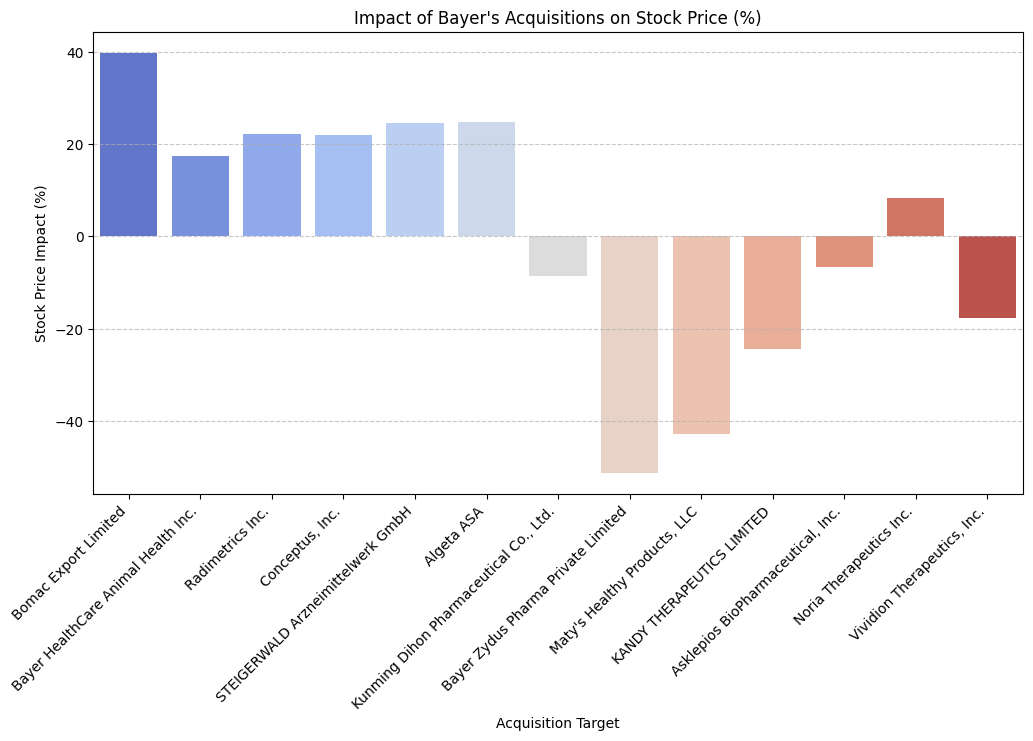

In [ ]:
# Install necessary libraries (if not installed)
!pip install pandas openpyxl matplotlib seaborn

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the Excel file
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Load Data
stock_df = pd.read_excel(file_name, sheet_name=0)
ma_df = pd.read_excel(file_name, sheet_name=1)

# Rename columns for clarity
stock_df.rename(columns={"Pricing Date": "Date"}, inplace=True)
ma_df.rename(columns={"SPTR_ANN_DATE": "Announcement Date"}, inplace=True)

# Convert Date Columns to datetime format
stock_df["Date"] = pd.to_datetime(stock_df["Date"])
ma_df["Announcement Date"] = pd.to_datetime(ma_df["Announcement Date"])

# Filter only Bayer’s acquisitions
bayer_ma_df = ma_df[ma_df["Acc Company"] == "Bayer"]

# Merge stock data with Bayer's M&A data based on Announcement Date
bayer_stock_impact = pd.merge(
    bayer_ma_df, stock_df, left_on="Announcement Date", right_on="Date", how="left"
)

# Calculate Stock Impact (Pre & Post M&A)
bayer_stock_impact["Pre_MA_Price"] = bayer_stock_impact["BAYN-Share Price (Daily)($)"].shift(1)
bayer_stock_impact["Post_MA_Price"] = bayer_stock_impact["BAYN-Share Price (Daily)($)"].shift(-1)

# Calculate Percentage Change
bayer_stock_impact["Impact (%)"] = (
    (bayer_stock_impact["Post_MA_Price"] - bayer_stock_impact["Pre_MA_Price"])
    / bayer_stock_impact["Pre_MA_Price"]
) * 100

# Drop missing values
bayer_stock_impact.dropna(subset=["Impact (%)"], inplace=True)

# 📊 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    data=bayer_stock_impact,
    x="Target name",
    y="Impact (%)",
    palette="coolwarm",
)
plt.xticks(rotation=45, ha="right")
plt.title("Impact of Bayer's Acquisitions on Stock Price (%)")
plt.xlabel("Acquisition Target")
plt.ylabel("Stock Price Impact (%)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


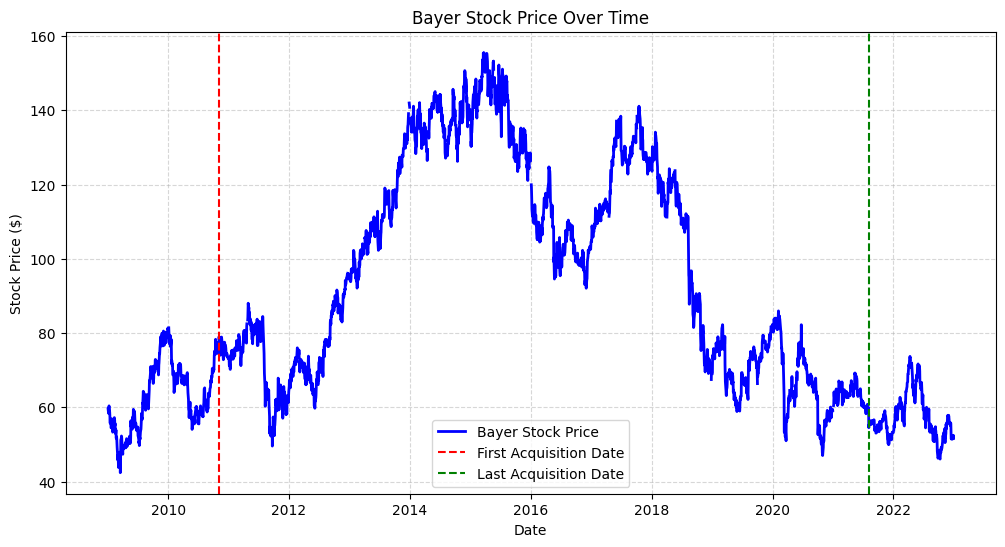

<ipython-input-11-4f64eab67f81>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


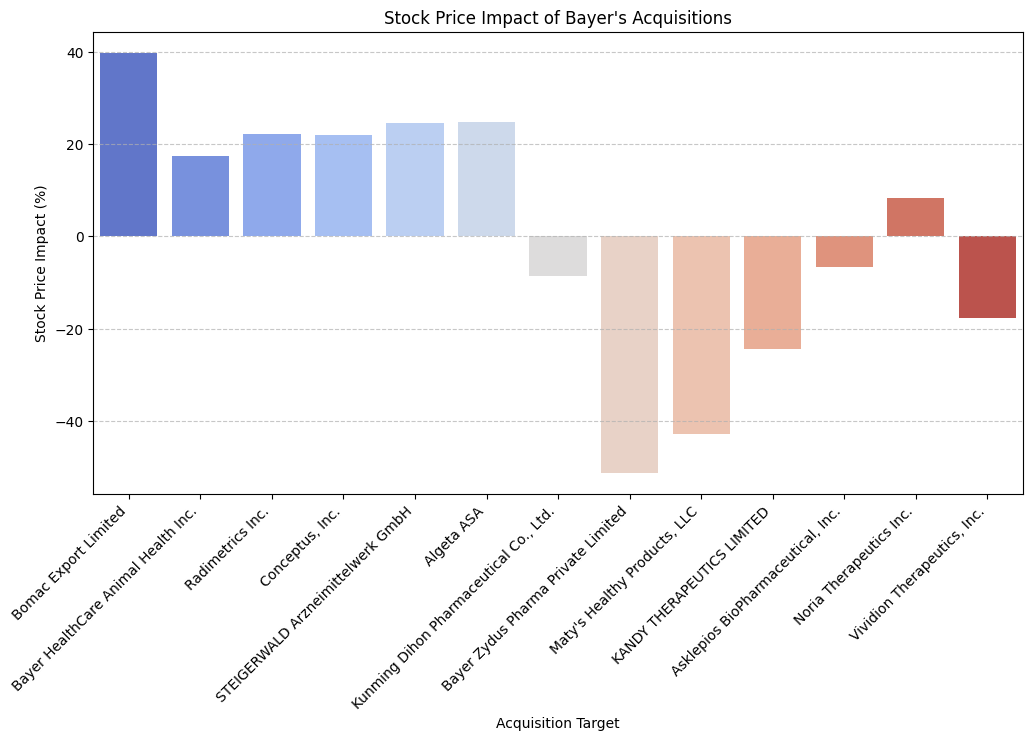

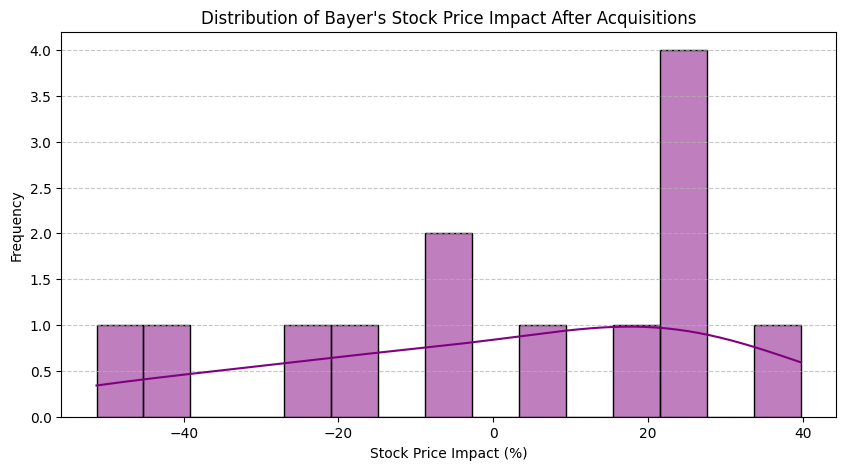

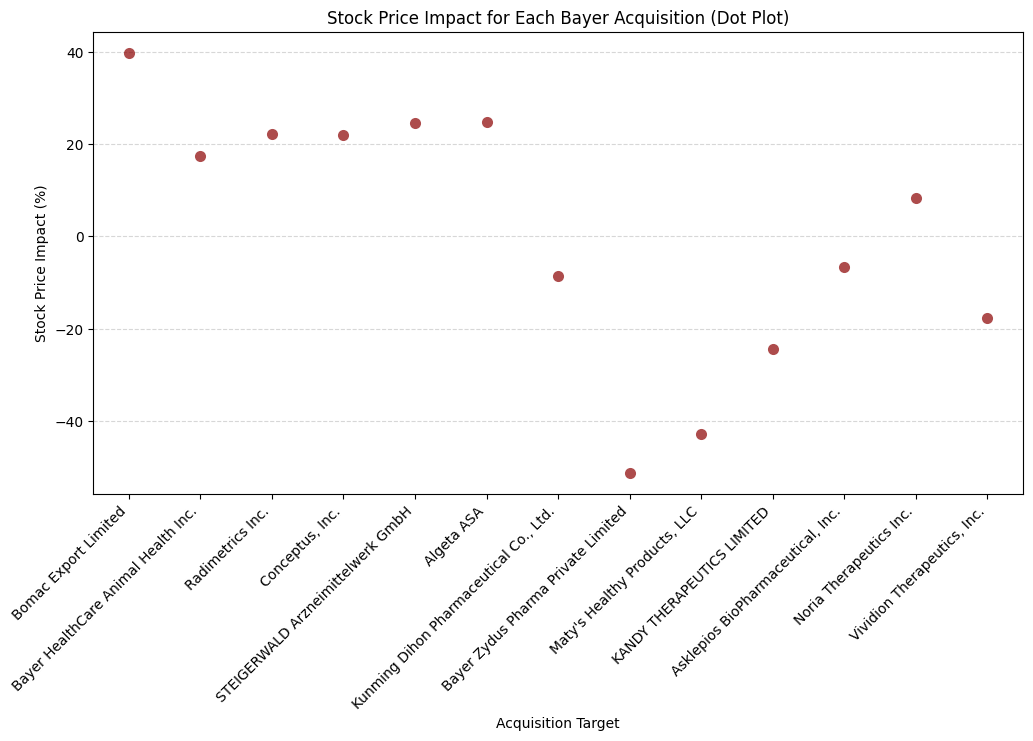

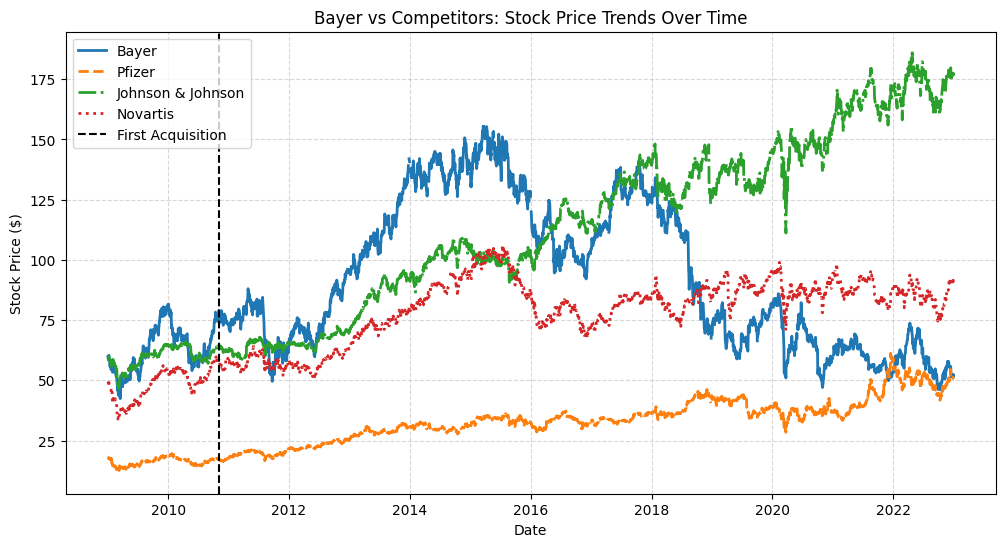

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ **Stock Price Movement Over Time (Line Chart)**
plt.figure(figsize=(12, 6))
plt.plot(stock_df["Date"], stock_df["BAYN-Share Price (Daily)($)"], label="Bayer Stock Price", color="blue", linewidth=2)
plt.axvline(x=bayer_stock_impact["Announcement Date"].min(), color="red", linestyle="--", label="First Acquisition Date")
plt.axvline(x=bayer_stock_impact["Announcement Date"].max(), color="green", linestyle="--", label="Last Acquisition Date")
plt.title("Bayer Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# 2️⃣ **Stock Price Before & After M&A (Bar Chart)**
plt.figure(figsize=(12, 6))
sns.barplot(
    x=bayer_stock_impact["Target name"],
    y=bayer_stock_impact["Impact (%)"],
    palette="coolwarm",
)
plt.xticks(rotation=45, ha="right")
plt.title("Stock Price Impact of Bayer's Acquisitions")
plt.xlabel("Acquisition Target")
plt.ylabel("Stock Price Impact (%)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 3️⃣ **Stock Price Change Distribution (Histogram)**
plt.figure(figsize=(10, 5))
sns.histplot(bayer_stock_impact["Impact (%)"], bins=15, kde=True, color="purple")
plt.title("Distribution of Bayer's Stock Price Impact After Acquisitions")
plt.xlabel("Stock Price Impact (%)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 4️⃣ **Dot Plot of Stock Price Impact Per Acquisition**
plt.figure(figsize=(12, 6))
sns.stripplot(
    x="Target name",
    y="Impact (%)",
    data=bayer_stock_impact,
    size=8,
    color="darkred",
    alpha=0.7
)
plt.xticks(rotation=45, ha="right")
plt.title("Stock Price Impact for Each Bayer Acquisition (Dot Plot)")
plt.xlabel("Acquisition Target")
plt.ylabel("Stock Price Impact (%)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# 5️⃣ **Stock Price Trends of Bayer vs Other Competitors (Line Chart)**
plt.figure(figsize=(12, 6))
plt.plot(stock_df["Date"], stock_df["BAYN-Share Price (Daily)($)"], label="Bayer", linewidth=2, linestyle="-")
plt.plot(stock_df["Date"], stock_df["PFE-Share Price (Daily)($)"], label="Pfizer", linewidth=2, linestyle="--")
plt.plot(stock_df["Date"], stock_df["JNJ-Share Price (Daily)($)"], label="Johnson & Johnson", linewidth=2, linestyle="-.")
plt.plot(stock_df["Date"], stock_df["NVS-Share Price (Daily)($)"], label="Novartis", linewidth=2, linestyle=":")
plt.axvline(x=bayer_stock_impact["Announcement Date"].min(), color="black", linestyle="--", label="First Acquisition")
plt.title("Bayer vs Competitors: Stock Price Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [ ]:
import numpy as np

# Convert date column to datetime if not already done
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
ma_df['SPTR_ANN_DATE'] = pd.to_datetime(ma_df['SPTR_ANN_DATE'])

# Filter Bayer's stock price
bayer_stock = stock_df[['Date', 'BAYN-Share Price (Daily)($)']].rename(
    columns={'BAYN-Share Price (Daily)($)': 'Bayer_Stock_Price'}
)

# Merging M&A data with stock price
merged_df = ma_df[['Target name', 'SPTR_ANN_DATE']].merge(
    bayer_stock, how='left', left_on='SPTR_ANN_DATE', right_on='Date'
)

# Time window before & after acquisition
window_days = 30
stats_list = []

for _, row in merged_df.iterrows():
    target_name = row['Target name']
    ann_date = row['SPTR_ANN_DATE']

    if pd.isna(ann_date):  # Skip if no valid announcement date
        continue

    # Filter stock prices within time window
    pre_acquisition = bayer_stock[(bayer_stock['Date'] >= ann_date - pd.Timedelta(days=window_days)) &
                                  (bayer_stock['Date'] < ann_date)]

    post_acquisition = bayer_stock[(bayer_stock['Date'] > ann_date) &
                                   (bayer_stock['Date'] <= ann_date + pd.Timedelta(days=window_days))]

    # Compute statistics
    summary = {
        'Target Name': target_name,
        'Announcement Date': ann_date.strftime('%Y-%m-%d'),
        'Pre-Mean': np.round(pre_acquisition['Bayer_Stock_Price'].mean(), 2),
        'Post-Mean': np.round(post_acquisition['Bayer_Stock_Price'].mean(), 2),
        'Pre-Median': np.round(pre_acquisition['Bayer_Stock_Price'].median(), 2),
        'Post-Median': np.round(post_acquisition['Bayer_Stock_Price'].median(), 2),
        'Pre-Std Dev': np.round(pre_acquisition['Bayer_Stock_Price'].std(), 2),
        'Post-Std Dev': np.round(post_acquisition['Bayer_Stock_Price'].std(), 2),
        'Pre-Min': np.round(pre_acquisition['Bayer_Stock_Price'].min(), 2),
        'Post-Min': np.round(post_acquisition['Bayer_Stock_Price'].min(), 2),
        'Pre-Max': np.round(pre_acquisition['Bayer_Stock_Price'].max(), 2),
        'Post-Max': np.round(post_acquisition['Bayer_Stock_Price'].max(), 2),
    }

    stats_list.append(summary)

# Convert results to DataFrame
stats_df = pd.DataFrame(stats_list)

# Display summary
print("📊 Detailed Statistical Summary:\n", stats_df)

# Save to Excel for client sharing
stats_df.to_excel("Bayer_Acquisition_Impact.xlsx", index=False)

print("✅ Statistical summary saved as 'Bayer_Acquisition_Impact.xlsx'")


📊 Detailed Statistical Summary:
                                Target Name Announcement Date  Pre-Mean  \
0                            Athenix Corp.        2009-08-19     59.98   
1                     Bomac Export Limited        2010-11-03     75.52   
2      Bayer HealthCare Animal Health Inc.        2012-09-14     79.26   
3                         Radimetrics Inc.        2012-11-26     85.89   
4                          Conceptus, Inc.        2013-04-29    104.68   
5        STEIGERWALD Arzneimittelwerk GmbH        2013-05-16    105.81   
6                               Algeta ASA        2013-11-26    126.59   
7   Kunming Dihon Pharmaceutical Co., Ltd.        2014-02-27    135.00   
8       Bayer Zydus Pharma Private Limited        2018-04-27    118.43   
9             Maty's Healthy Products, LLC        2019-07-11     64.54   
10              KANDY THERAPEUTICS LIMITED        2020-08-11     69.57   
11       Asklepios BioPharmaceutical, Inc.        2020-10-26     54.32   
12   

In [ ]:
from google.colab import files
files.download("Bayer_Acquisition_Impact.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Display column names to see if there's a mismatch
print(ma_df.columns.tolist())


['Acc Company', 'Target name', 'SPTR_MI_TRANSACTION_ID', 'Announcement Date', 'SPTR_TRANSACTION_TYPE', 'SPTR_STATUS']


In [ ]:
# Check column names to see the exact format
print(stock_df.columns)

# Strip spaces and rename if needed
stock_df.columns = stock_df.columns.str.strip()


Index(['Date', 'ABBV-Share Price (Daily)($)', 'BAYN-Share Price (Daily)($)',
       'AMGN-Share Price (Daily)($)', '4503-Share Price (Daily)($)',
       'AZN-Share Price (Daily)($)', 'BIIB-Share Price (Daily)($)',
       'BMY-Share Price (Daily)($)', 'GILD-Share Price (Daily)($)',
       'GSK-Share Price (Daily)($)', 'JNJ-Share Price (Daily)($)',
       'LLY-Share Price (Daily)($)', 'MRK-Share Price (Daily)($)',
       'NVS-Share Price (Daily)($)', 'NVO-Share Price (Daily)($)',
       'PFE-Share Price (Daily)($)', 'ROG-Share Price (Daily)($)',
       'SNY-Share Price (Daily)($)', 'TAK-Share Price (Daily)($)',
       'TEVA-Share Price (Daily)($)',
       'S&P 500 Price Return-Index Value (Daily)'],
      dtype='object')


In [ ]:
ma_df.rename(columns={"Announcement Date": "SPTR_ANN_DATE"}, inplace=True)
